# Splitting color channels and Color Spaces

## Splitting color channels

A color image consists of multiple channels: a Red, a Green, and a Blue component. We have seen that we can access these components via indexing into NumPy arrays and we can access the specific color channels of an image.

### Import resources

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

### Read in an image

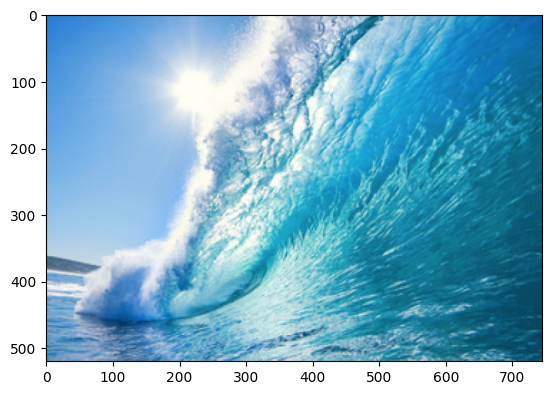

In [31]:
# Read and display the image
image = cv2.imread('DL_Data_sets/images/wave.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)

We have an image of a wave crashing down. This image is very “blue” due to the ocean. How do we interpret the different channels of the image?

### RGB channels with a 1D map

Visualize the levels of each color channel for a 1d map, i.e, grayscale.

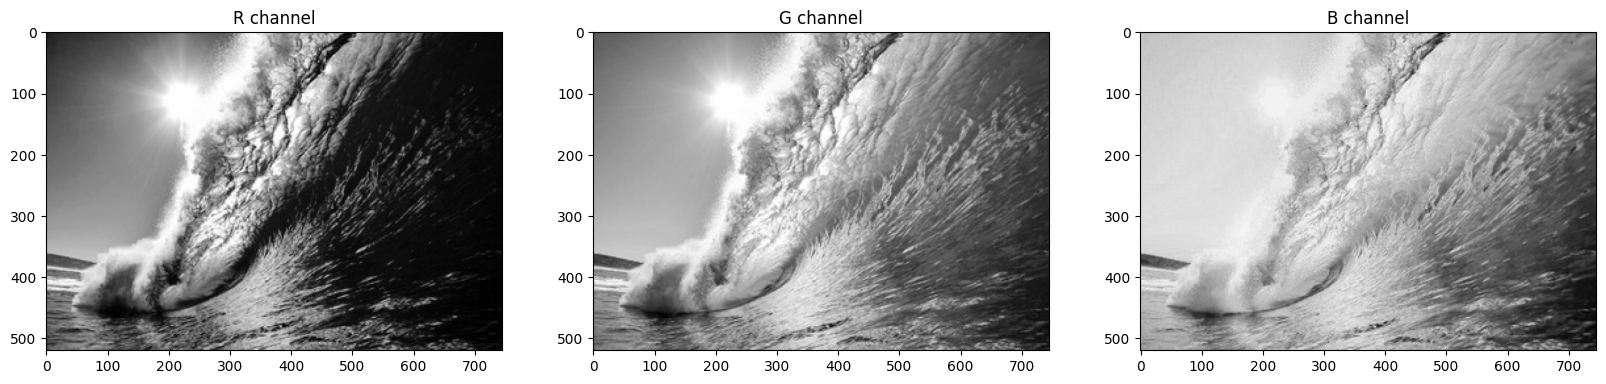

In [32]:
# Isolate RGB channels
r = image[:,:,0]
g = image[:,:,1]
b = image[:,:,2]

# Display each color in a grayscale map

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))
ax1.set_title('R channel')
ax1.imshow(r, cmap='gray')
ax2.set_title('G channel')
ax2.imshow(g, cmap='gray')
ax3.set_title('B channel')
ax3.imshow(b, cmap='gray')

The `split()` and `merge()` methods in OpenCV are used for manipulating color channels in an image.

The `split()` method allows us to separate the color channels of an image, such as the Red, Green, and Blue channels. It takes an image as input and returns a list of individual color channel arrays. Each array represents a specific color channel, and we can access and manipulate them independently. This is useful when we want to perform operations on specific color channels or analyze the intensity of each channel separately.

On the other hand, the `merge()` method is used to combine individual color channel arrays back into a single image. It takes a list of color channel arrays as input and returns a merged image. This allows us to reconstruct the original image after performing operations on individual color channels.

By using the `split()` and `merge()` methods, we can easily manipulate and analyze color channels in an image, enabling us to perform various tasks such as color correction, channel-based filtering, and feature extraction.

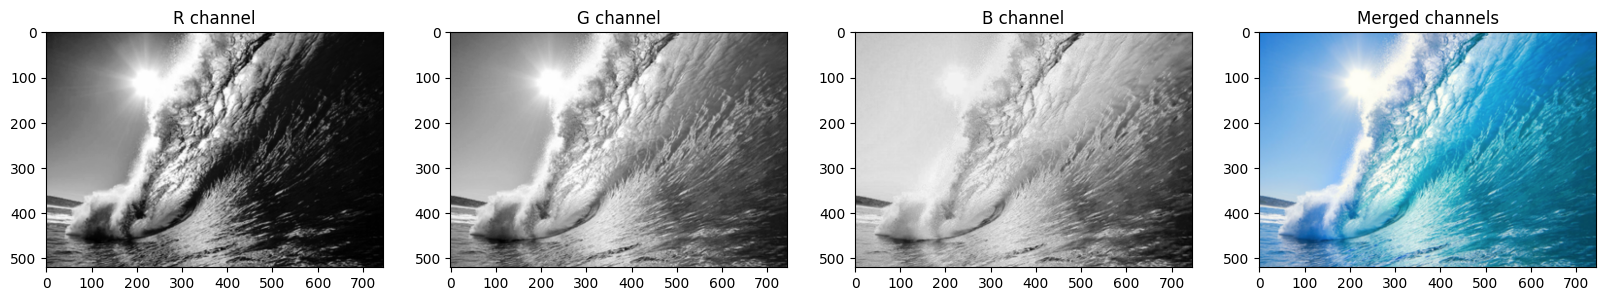

In [33]:
# Isolate RGB channels

(r, g, b) = cv2.split(image)

image_merged = cv2.merge((r, g, b))

# Display each color in a grayscale map

f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20,10))
ax1.set_title('R channel')
ax1.imshow(r, cmap='gray')
ax2.set_title('G channel')
ax2.imshow(g, cmap='gray')
ax3.set_title('B channel')
ax3.imshow(b, cmap='gray')
ax4.set_title('Merged channels')
ax4.imshow(image_merged, cmap='gray')

### RGB channels with a 3D map

Visualize the levels of each color channel for a 3d map, i.e, only red, green, or blue.

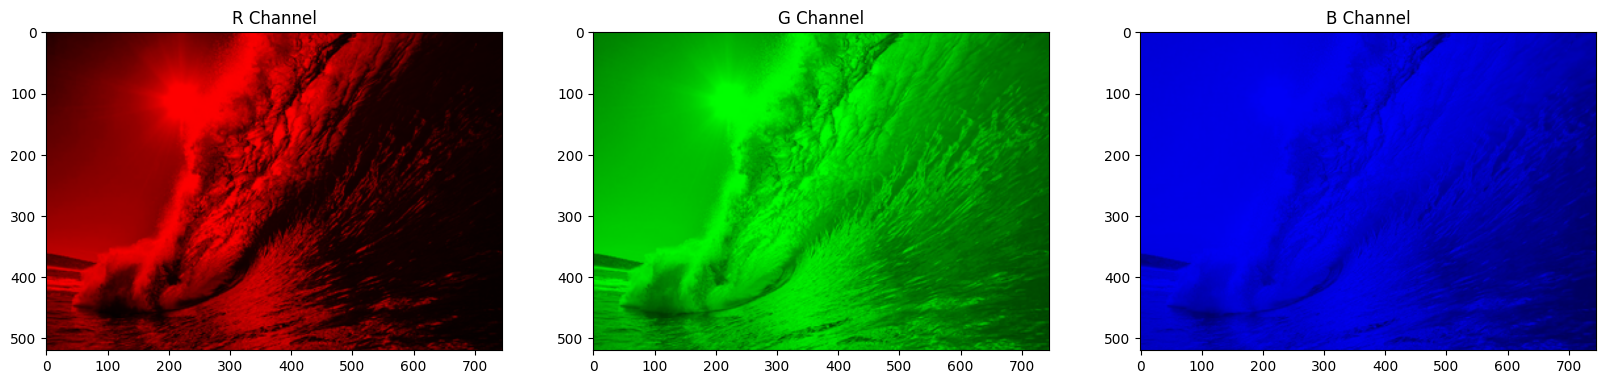

In [34]:
# Visualize the individual color channels

names = ['R Channel', 'G Channel', 'B Channel']
figure, plots = plt.subplots(1, 3, figsize=(20,10))

for i, subplot, name in zip(range(3), plots, names):
    temp = np.zeros(image.shape, dtype='uint8')
    temp[:,:,i] = image[:,:,i]
    subplot.set_title(name)
    subplot.imshow(temp)

## Color spaces

A range of colors can be created by the primary colors of pigment and these colors then define a specific color space. Color space, also known as the color model (or color system), is an abstract mathematical model which simply describes the range of colors as tuples of numbers, typically as 3 or 4 values or color components (e.g. RGB). Basically speaking, color space is an elaboration of the coordinate system and sub-space. Each color in the system is represented by a single dot.

A color space is a useful method for users to understand the color capabilities of a particular digital device or file. It represents what a camera can see, a monitor can display or a printer can print, and etc. There are a variety of color spaces, such as RGB, HSV, HLS, as seen below.

![Color spaces](https://raw.githubusercontent.com/octavio-navarro/Computer-Vision/refs/heads/main/Notebooks/images/Color_spaces.png)

HSL and HSV are the two most common cylindrical-coordinate representations of points in an RGB color model. The two representations rearrange the geometry of RGB in an attempt to be more intuitive and perceptually relevant than the cartesian (cube) representation. Developed in the 1970s for computer graphics applications, HSL and HSV are used today in color pickers, in image editing software, and less commonly in image analysis and computer vision.

HSL stands for hue, saturation, and lightness, and is often also called HLS. HSV stands for hue, saturation, and value.

In each cylinder, the angle around the central vertical axis corresponds to "hue", the distance from the axis corresponds to "saturation", and the distance along the axis corresponds to "lightness", "value" or "brightness".

![HSV values](https://raw.githubusercontent.com/octavio-navarro/Computer-Vision/refs/heads/main/Notebooks/images/HSV_color_solid_cylinder_saturation_gray.png)

### Using the HSV color space

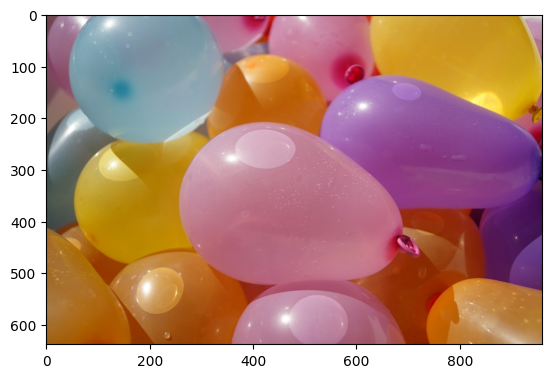

In [35]:
# Read in the image
image = cv2.imread('DL_Data_sets/images/water_balloons.jpg')

# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)

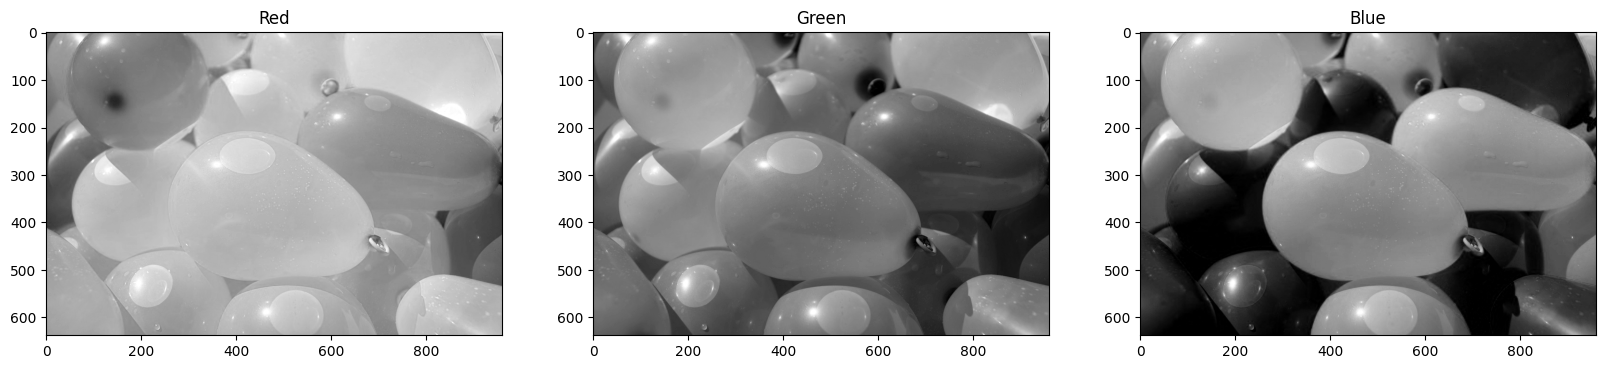

In [36]:
# RGB channels
r = image[:,:,0]
g = image[:,:,1]
b = image[:,:,2]

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))

ax1.set_title('Red')
ax1.imshow(r, cmap='gray')

ax2.set_title('Green')
ax2.imshow(g, cmap='gray')

ax3.set_title('Blue')
ax3.imshow(b, cmap='gray')

Min - Max hue: 0 - 179
Min - Max saturation: 0 - 255
Min - Max value: 13 - 255


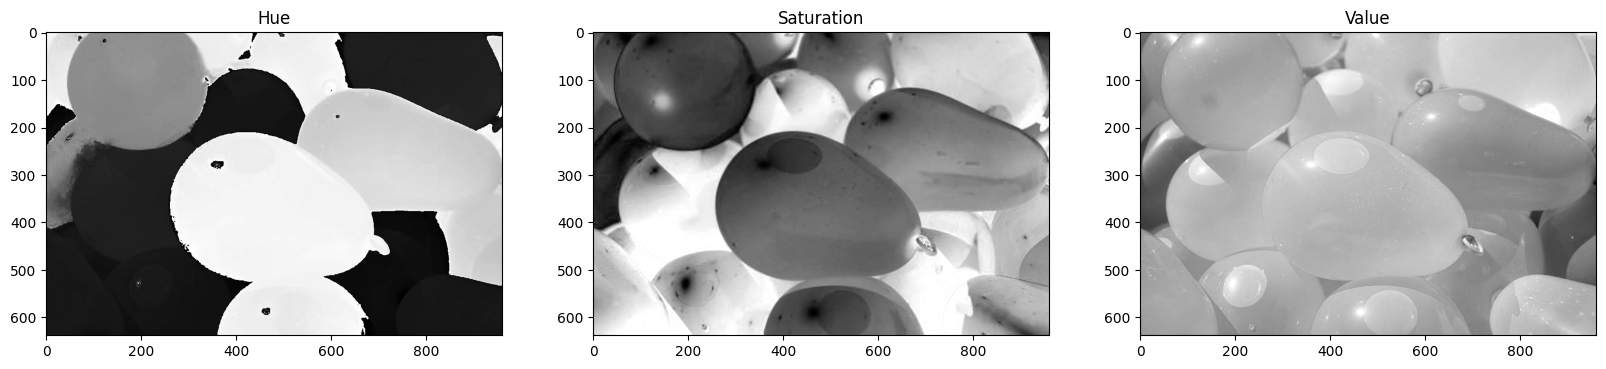

In [37]:
# Convert from RGB to HSV
hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

# HSV channels
h = hsv[:,:,0]
s = hsv[:,:,1]
v = hsv[:,:,2]

print(f'Min - Max hue: {np.min(h)} - {np.max(h)}')
print(f'Min - Max saturation: {np.min(s)} - {np.max(s)}')
print(f'Min - Max value: {np.min(v)} - {np.max(v)}')

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))

ax1.set_title('Hue')
ax1.imshow(h, cmap='gray')

ax2.set_title('Saturation')
ax2.imshow(s, cmap='gray')

ax3.set_title('Value')
ax3.imshow(v, cmap='gray')

### Challenge

Remove the background from the following image:

![Greenscreen car](https://raw.githubusercontent.com/octavio-navarro/Computer-Vision/refs/heads/main/Notebooks/images/car_green_screen.jpg)


This image is: <class 'numpy.ndarray'> with dimensions:  (450, 660, 3)


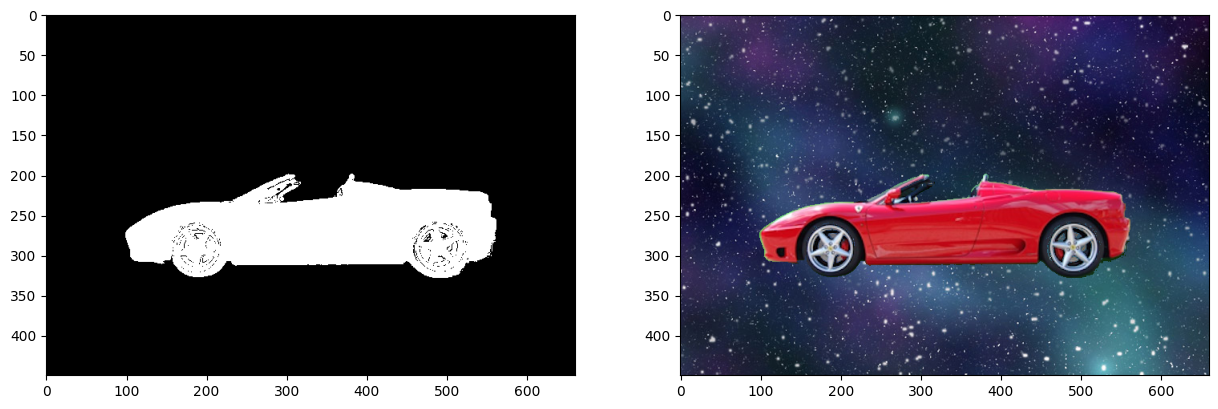

In [38]:
# Read in the image
image = cv2.imread('DL_Data_sets/images/car_green_screen.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print(f'This image is: {type(image)} with dimensions:  {image.shape}')

image_copy = np.copy(image)

lower_green = np.array([0, 50, 0])
upper_green = np.array([100, 255, 100])

mask = cv2.inRange(image_copy, lower_green, upper_green)

masked_image = np.copy(image_copy)

filter = mask != 0
masked_image[filter] = [0, 0, 0]

masked_image_bitwise = np.copy(image_copy)

mask_inverted = cv2.bitwise_not(mask)
masked_image_bitwise = cv2.bitwise_and(masked_image_bitwise, masked_image_bitwise, mask=mask_inverted)

f, axes = plt.subplots(1, 2, figsize=(15, 10))
axes[0].imshow(mask_inverted, cmap='gray')
axes[1].imshow(masked_image_bitwise)

background_image = cv2.imread('DL_Data_sets/images/space_background.jpg')
background_image = cv2.cvtColor(background_image, cv2.COLOR_BGR2RGB)

crop_background = background_image[0:450, 0:660]

crop_background[mask == 0] = [0, 0, 0]

plt.imshow(crop_background)

complete_image = crop_background + masked_image

plt.imshow(complete_image)